# Quick EDA of 2021 Fort Collins, Colorado City Employee Salary Data

Chris Ellis

6/26/2022

## Intro

Having just finished the Data Analyst career path on Codecademy, I want to take a stab at some real world EDA using Jupyter Notebook.  I need a pretty beginner dataset(pretty tidy and relatively small), as well as something that isn't already on Kaggle.  After some searching I settled on Fort Collins city employee salary data - it's the city I (currently) live in, so it's of some personal interest to me.  I plan to do more complex notebooks in the not-too-distant future, but this feels like a good starting point.


In [250]:
#import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [254]:
#load csv
foco_pay = pd.read_csv('/Users/chrisellis/Desktop/CSVs/2021_Fort_Collins_City_Employee_Base_Pay.csv')


#quick inspection to get familiar with table
foco_pay.head(20)

,Job Title,Service Area,Department,Annual Salary or Hourly Rate,Pay Type,meta_row_index,meta_row_id
0,City Attorney,Legal Services,City Attorney's Office,206090.04,Annual Salary,0,96a2acd9a2ac1b6e44e8fecc9f94b6672f67454b
1,Chief Of Police,Police Services,Police Administration,203692.92,Annual Salary,1,99daa98a180665b6a2312a2ebc29c8fc38f121b1
2,Deputy City Manager,Executive Services,City Manager's Office,201368.44,Annual Salary,2,57fd2825f42983e70ce2e21a18dadd2d67dad077
3,Deputy City Manager,Executive Services,City Manager's Office,198000.00,Annual Salary,3,77a4a92b57770d4811927556adccb8d717f25d4c
4,Administrative Fire Chief,Poudre Fire Authority,Poudre Fire Authority,185000.00,Annual Salary,4,fda5a9a3566a7956f0f5e4cc1d64f13008b95dae
5,Police Deputy Chief,Police Services,Police Administration,176177.88,Annual Salary,5,eaf62c829dacee382e9bfd1b8a8f6671e7a5b9ff
6,Chief Financial Officer,Financial Services,Finance Administration,170000.00,Annual Salary,6,40088129ab0597dd9871cefcb02b82bdc077cfa6
7,Broadband Executive Director,Utility Services,Broadband,168000.00,Annual Salary,7,8c577cd373a0278b9aa82d5b445aa7ffa8dce62f
8,Chief Judge,Judicial Services,Municipal Court,165000.00,Annual Salary,8,03d0cb16144ea054e169119658f0a8a236cb445f
9,Director Of PDT,"Planning, Dev & Transportation",PDT Administration,164999.90,Annual Salary,9,99ec05f8f0256ee6505781d3ddcc8b16819be172


 - I immediately notice some columns that aren't going to be of use to me here.  There's also some duplicate rows, which I assume relate to number of employee's in a specific position.  I'm just comparing pay rates in this journal, so total employee's isn't of interest here.

In [257]:
#drop uneccesary rows and columns

foco_pay.drop(['meta_row_index', 'meta_row_id'], axis=1, inplace=True)
foco_pay.drop_duplicates(inplace=True)
foco_pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1595 entries, 0 to 2633
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Job Title                     1595 non-null   object 
 1   Service Area                  1595 non-null   object 
 2   Department                    1595 non-null   object 
 3   Annual Salary or Hourly Rate  1595 non-null   float64
 4   Pay Type                      1595 non-null   object 
dtypes: float64(1), object(4)
memory usage: 74.8+ KB


 - Now that the dataset is ready, the first thing to do is get a feel for pay rate distributions.  The data is split between Annual Salaries and Hourly Rates, so those need to be seperated.  From there, it's time to plot distributions.  I also want to chart the median and mean for each distribution.

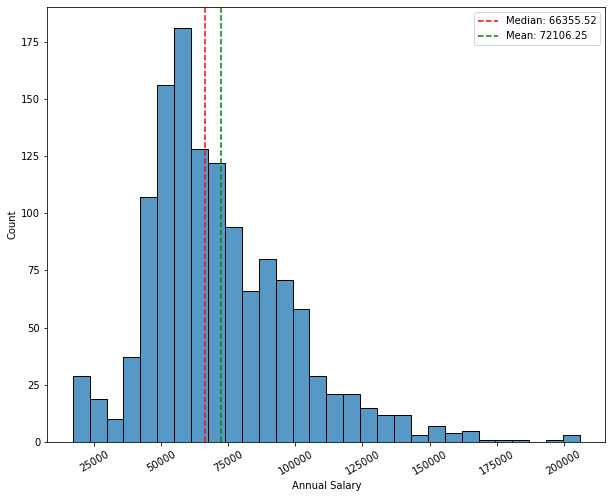

<Figure size 432x288 with 0 Axes>

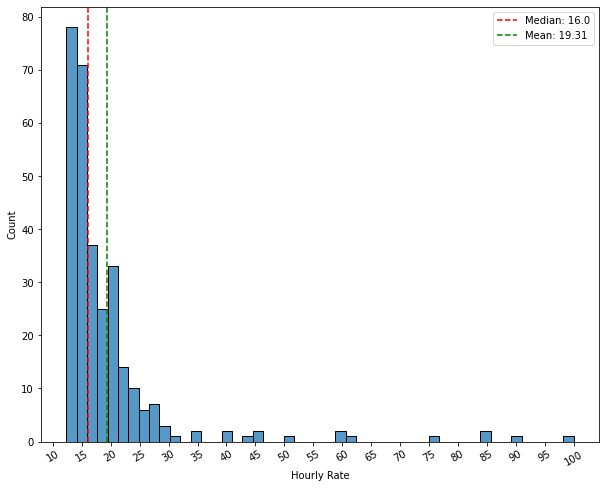

<Figure size 432x288 with 0 Axes>

In [258]:
#seperating Annual Salaries and Hourly Rates

foco_annual_rate = foco_pay[foco_pay['Pay Type'] == 'Annual Salary']
foco_hourly_rate = foco_pay[foco_pay['Pay Type'] == 'Hourly']



plt.figure(figsize=(10,8))

sns.histplot(foco_annual_rate['Annual Salary or Hourly Rate'])
plt.axvline(x=foco_annual_rate['Annual Salary or Hourly Rate'].median(), color='red', ls= '--', label='Median: ' + 
           str(round(foco_annual_rate['Annual Salary or Hourly Rate'].median(), 2)))
plt.axvline(x=foco_annual_rate['Annual Salary or Hourly Rate'].mean(), color='green', ls= '--', label='Mean: ' +
           str(round(foco_annual_rate['Annual Salary or Hourly Rate'].mean(), 2)))
plt.legend()
plt.xticks(rotation=30)
plt.xlabel('Annual Salary')

plt.show()
plt.clf()

plt.figure(figsize=(10,8))

ax = plt.subplot()
sns.histplot(foco_hourly_rate['Annual Salary or Hourly Rate'])
plt.axvline(x=foco_hourly_rate['Annual Salary or Hourly Rate'].median(), color='red', ls= '--', label='Median: ' + 
           str(round(foco_hourly_rate['Annual Salary or Hourly Rate'].median(), 2)))
plt.axvline(x=foco_hourly_rate['Annual Salary or Hourly Rate'].mean(), color='green', ls= '--', label='Mean: ' +
           str(round(foco_hourly_rate['Annual Salary or Hourly Rate'].mean(), 2)))
plt.legend()
plt.xticks(rotation=30)
ax.set_xticks(range(10,105,5))
plt.xlabel('Hourly Rate')

plt.show()
plt.clf()

 - The first thing I'm noticing is heavy skew on both distributions.  The second (and more interesting) thing is that hourly employees make far less than salaried employees on a per hour basis.  The mean and median of the Hourly Rate distribuition are roughly equivalent to $30000-40000 per year.  

 - I thought it'd be interesting to see how well Data jobs paid in relation to overall city jobs, since that's ultimately the career I'm looking for.

In [259]:
#show jobs with keyword 'data'


analyst_jobs = foco_pay.loc[foco_pay['Job Title'].str.contains('data', case=False)]
print(analyst_jobs)

                       Job Title                    Service Area  \
86    Sr Administrator, Database     Information & Employee Svcs   
909              Analyst I, Data  Planning, Dev & Transportation   
1254     Planning & Data Analyst           Poudre Fire Authority   
2004     Planning & Data Analyst                Utility Services   
2288            Data Entry Clerk     Information & Employee Svcs   

                          Department  Annual Salary or Hourly Rate  \
86            Information Technology                     122731.21   
909     Transfort / Parking Services                      72800.00   
1254           Poudre Fire Authority                      59373.86   
2004  Utilities Customer Connections                         20.00   
2288              Operation Services                         14.50   

           Pay Type  
86    Annual Salary  
909   Annual Salary  
1254  Annual Salary  
2004         Hourly  
2288         Hourly  


 - Only 5 jobs with the keyword 'Data', and of those one is a senior position.  Data Analyst's for Planning, Development and Transportation Services are paid about average compared to the rest of the City employee's.  The Poudre Fire Analyst job makes roughly 15-20% less than average.  The other 2 jobs pay hourly - both are around average for hourly employees.

 - Next, I want to see how each job category compares to the overall pay data.  First thing to do is sort the categories.  I'm curious if sorting them by mean and median will reveal any discrepancies. 

In [260]:
#different job categories, sorted by mean salary, descending

jobs_sorted_mean = foco_annual_rate.groupby('Service Area')['Annual Salary or Hourly Rate'].mean().sort_values(ascending=False)
print(jobs_sorted)


sorted_list = [
    'Legal Services',
    'Poudre Fire Authority',
    'Executive Services',
    'Police Services',
    'Downtown Development Authority',
    'Sustainability Services',
    'Information & Employee Svcs',
    'Financial Services',
    'Utility Services',
    'Planning, Dev & Transportation',
    'Community Services',
    'Judicial Services',
    'Library District'
]

Service Area
Legal Services                    102871.038095
Poudre Fire Authority              90543.879574
Executive Services                 88687.275200
Police Services                    84398.998876
Downtown Development Authority     80887.675556
Sustainability Services            79197.922571
Information & Employee Svcs        78839.108485
Financial Services                 78423.932449
Utility Services                   75004.540848
Planning, Dev & Transportation     65237.351405
Community Services                 62861.145255
Judicial Services                  50783.476429
Library District                   44987.625972
Name: Annual Salary or Hourly Rate, dtype: float64


In [166]:
#sorted by median salary, descending

jobs_sorted_median = foco_annual_rate.groupby('Service Area')['Annual Salary or Hourly Rate'].median().sort_values(ascending=False)
print(jobs_sorted_median)

Service Area
Legal Services                    105000.000
Poudre Fire Authority              88019.880
Financial Services                 76891.620
Sustainability Services            75704.920
Downtown Development Authority     75599.940
Information & Employee Svcs        75505.410
Police Services                    75116.000
Executive Services                 71999.980
Utility Services                   71769.420
Planning, Dev & Transportation     60547.420
Community Services                 59899.970
Judicial Services                  43391.295
Library District                   40950.285
Name: Annual Salary or Hourly Rate, dtype: float64


Interesting! Average Executive Service salaries are almost 89,000, but the median salary is just 72,000.  Police have a fairly large range too, a mean salary of 84,000 compared to a median salary of around 75,000.  The rest of the salaries have pretty comparable means and medians.  Let's dig a little deeper:

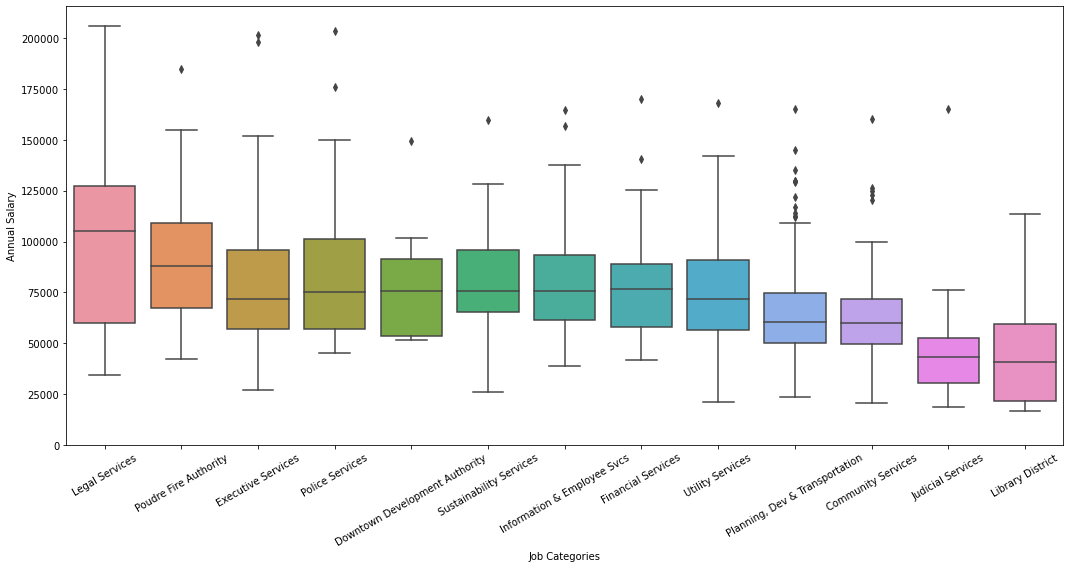

<Figure size 432x288 with 0 Axes>

In [201]:
#boxplots showing ranges of salary for each job category, ordered by mean(descending)


plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.boxplot(data=foco_annual_rate, x='Service Area', y='Annual Salary or Hourly Rate', order=sorted_list)
plt.xticks(rotation=30)
ax.set_yticks(range(0, 225000, 25000))
plt.xlabel('Job Categories')
plt.ylabel('Annual Salary')
plt.tight_layout()

plt.show()
plt.clf()

 - Legal Services have a really wide range of salaries.  Judicial Services, while tangentially related, have a much smaller range and lot less earning potential.  Interesting to note the extreme outliers and how they're affecting the mean range.  Planning, Development, and Transportation has one of the smallest Q2-Q3 ranges, as well as the most outliers.  